In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

2024-04-30 16:47:16.552824: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 16:47:16.556851: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 16:47:16.609254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 16:47:17.600904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
PATCH_SIZE = 128
OUTPUT_FILE = '/home/stefany/imazon/increment/data/train.tfrecord.gz'

FEATURES_T0T1 = ['swir1_median_t0', 'nir_median_t0', 'red_median_t0',
            'swir1_median_t1', 'nir_median_t1', 'red_median_t1',
            'reference'
            ]

FEATURES_T1 = [
    'swir1_median', 'nir_median', 'red_median',
    'reference'
]

KERNEL_SHAPE = [PATCH_SIZE, PATCH_SIZE]
COLUMNS = [
  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES_T1
]
FEATURES_DICT = dict(zip(FEATURES_T1, COLUMNS))

In [9]:
def parse_tfrecord(example_proto):
  """Parse a serialized example."""
  return tf.io.parse_single_example(example_proto, FEATURES_DICT)

dataset = tf.data.TFRecordDataset(OUTPUT_FILE)
dataset = dataset.map(parse_tfrecord, num_parallel_calls=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-04-30 16:57:36.557476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


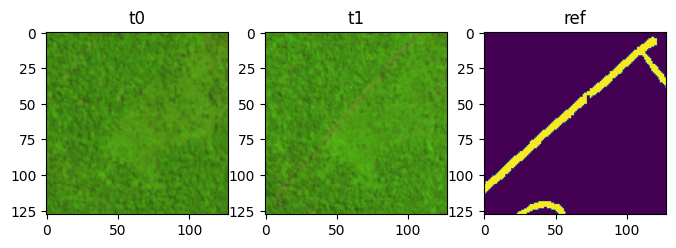

In [24]:
take_10 = dataset.take(90).skip(1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,8))

for data in take_10:
  rgb_t0 = np.stack([
      data['swir1_median_t0'].numpy(),
      data['nir_median_t0'].numpy(),
      data['red_median_t0'].numpy()]) / 5000
  
  rgb_t1 = np.stack([
      data['swir1_median_t1'].numpy(),
      data['nir_median_t1'].numpy(),
      data['red_median_t1'].numpy()]) / 5000
  
  ref = np.stack(data['reference'].numpy())

  rgb_move_0 = np.moveaxis(rgb_t0, 0, -1)
  rgb_move_1 = np.moveaxis(rgb_t1, 0, -1)
  ref_move = np.moveaxis(ref, 0, -1)

  # print(rgb_move.shape)
  axes[0].imshow(rgb_move_0)
  axes[0].set_title('t0')
  # axes[0].axis('off')

  axes[1].imshow(rgb_move_1)
  axes[1].set_title('t1')
  # axes[1].axis('off')

  axes[2].imshow(ref_move)
  axes[2].set_title('ref')
  # axes[2].axis('off')

plt.show()